![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

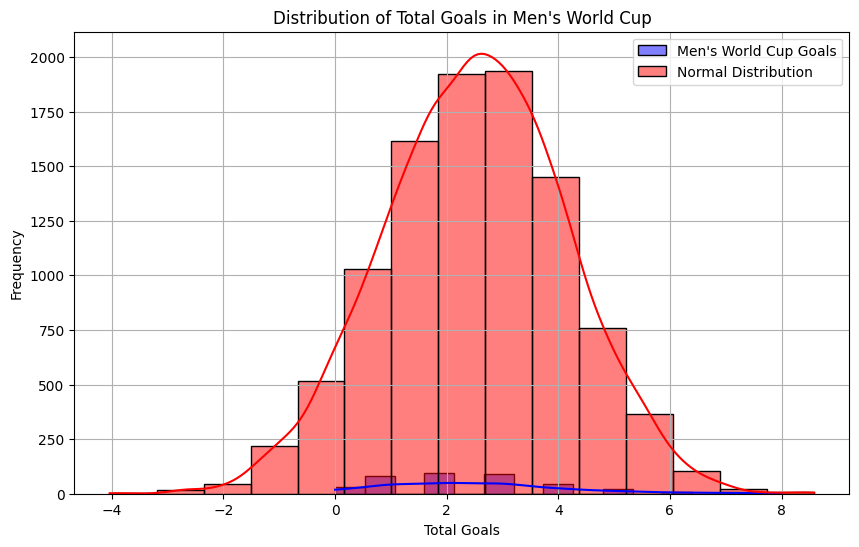

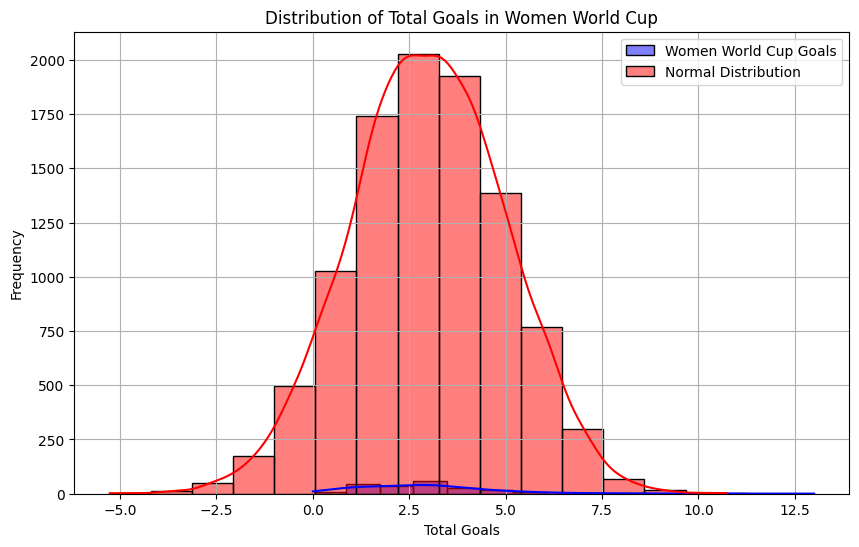

In [5]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

mens=pd.read_csv('men_results.csv')
women=pd.read_csv('women_results.csv')
# Performing EDA on the mens and womens data
#Mens
mens['date']=pd.to_datetime(mens['date'])
mens=mens[mens['date']>='2002-01-01']
mens=mens[mens['tournament'].isin(['FIFA World Cup'])]
mens['total_goals']=mens['home_score']+mens['away_score']
#Women
women['date']=pd.to_datetime(women['date'])
women=women[women['date']>='2002-01-01']
women=women[women['tournament'].isin(['FIFA World Cup'])]
women['total_goals']=women['home_score']+women['away_score']

# Checking if the data is normally distributed
#Generating a random data
mu,sigma= np.mean(mens['total_goals']),np.std(mens['total_goals'])
normal_dist=np.random.normal(mu,sigma,size=10000)

#plot the histogram of actual data
plt.figure(figsize=(10,6))
sns.histplot(mens['total_goals'],bins=15,kde=True,color='blue',alpha=0.5,label='Men\'s World Cup Goals')
# plot the fitted normal distribution for mens
sns.histplot(normal_dist, bins=15, kde=True, color='red', alpha=0.5, label='Normal Distribution')

plt.title('Distribution of Total Goals in Men\'s World Cup')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


mean,std= np.mean(women['total_goals']),np.std(women['total_goals'])
normal_distr=np.random.normal(mean,std,size=10000)

#plot the histogram of actual data
plt.figure(figsize=(10,6))
sns.histplot(women['total_goals'],bins=15,kde=True,color='blue',alpha=0.5,label='Women World Cup Goals')
# plot the fitted normal distribution for mens
sns.histplot(normal_distr, bins=15, kde=True, color='red', alpha=0.5, label='Normal Distribution')

plt.title('Distribution of Total Goals in Women World Cup')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Running the Shapiro-wilk test

from scipy import stats

#mens data
#  data
data = mens['total_goals']

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)

# Output the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.01
if p_value > alpha:
    print("Fail to reject the null hypothesis. The data appears to be normally distributed.")
else:
    print("Reject the null hypothesis. The data does not appear to be normally distributed.")

from scipy import stats

#women data

# women data
datas = women['total_goals']
# Perform Shapiro-Wilk test
statistics, p_values = stats.shapiro(datas)

# Output the results
print("Shapiro-Wilk Test Statistic:", statistics)
print("P-value:", p_values)

# Interpret the results
alpha = 0.01
if p_values > alpha:
    print("Fail to reject the null hypothesis. The data appears to be normally distributed.")
else:
    print("Reject the null hypothesis. The data does not appear to be normally distributed.")



Shapiro-Wilk Test Statistic: 0.9266489744186401
P-value: 8.894154401688226e-13
Reject the null hypothesis. The data does not appear to be normally distributed.
Shapiro-Wilk Test Statistic: 0.8491013050079346
P-value: 3.8905201759850683e-13
Reject the null hypothesis. The data does not appear to be normally distributed.


In [7]:
from scipy import stats

# Assuming mens and women are DataFrames with 'total_goals' column

# Perform Mann-Whitney U test
stat, p_val = stats.mannwhitneyu(women['total_goals'],mens['total_goals'],alternative='greater' )

# Output the results
print("Mann-Whitney U Test Statistic:", stat)
print("P-value:", p_val)

# Interpret the results
alpha = 0.01
if p_val <= alpha:
    print("Reject the null hypothesis. There is a significant difference between mean number of goals scored in women's and men's international soccer matches.")
    result = "reject"
else:
    print("Fail to reject the null hypothesis. The mean number of goals scored in women's international soccer matches is the same as men's.")
    result = "fail to reject"

# Store results in a dictionary
result_dict = {
    "p_val": p_val,
    "result": result
}

print(result_dict)


Mann-Whitney U Test Statistic: 43273.0
P-value: 0.005106609825443641
Reject the null hypothesis. There is a significant difference between mean number of goals scored in women's and men's international soccer matches.
{'p_val': 0.005106609825443641, 'result': 'reject'}
